# Lebensmittel Data Visualization

In [1]:
import pandas as pd
ds_path = "data/LEBENSMITTEL.xlsx"
ds_path_others = "data/others_expenses.xlsx"
df_lebensmittel = pd.read_excel(ds_path, index_col=None)
df_others = pd.read_excel(ds_path_others, index_col=None)

In [2]:
all_columns = set(df_lebensmittel.columns).union(set(df_others.columns))

# Step 3: Add missing columns to each df with NaN values
for col in all_columns:
    if col not in df_lebensmittel.columns:
        df_lebensmittel[col] = pd.NA
    if col not in df_others.columns:
        df_others[col] = pd.NA

# Step 4: Reorder columns in both dfs to the same order
df_lebensmittel = df_lebensmittel[sorted(all_columns)]
df_others = df_others[sorted(all_columns)]

# Step 5: Concatenate
df = pd.concat([df_lebensmittel, df_others], ignore_index=True)


/tmp/ipykernel_299055/2940826687.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df_lebensmittel, df_others], ignore_index=True)


In [3]:
df.head()

,angebote,bio?,brand,category,currency,datum,detail,filiale,laden,land,origin,preis,product,quantity,stadt,unit,vegan
0,0,1.0,ALNATURA,Zutaten,euro,2025-06-30,purée,44165,EDEKA,Deutschland,netherlands,3.99,TAHIN SESAMMUS,250.0,Wiesbaden,gram,1.0
1,0,1.0,ALNATURA,Gemüse,euro,2025-06-30,NaN,44166,EDEKA,Deutschland,netherlands,1.79,MAIS,230.0,Wiesbaden,gram,1.0
2,0,NaN,EDEKA HERZSTÜKE,Gemüse,euro,2025-06-30,NaN,44167,EDEKA,Deutschland,deutschland,1.59,SCHWARZ BOHNEN,400.0,Wiesbaden,gram,1.0
3,0,NaN,ARTEALKA SL,Gemüse,euro,2025-06-30,NaN,44168,EDEKA,Deutschland,spain,2.99,ZUCKERMAIS,2.0,Wiesbaden,units,1.0
4,0,1.0,DIE MAINZER KAFFEE MANUFAKTUR,Getränk,euro,2025-06-30,ENTKOFFEINIERT,44169,EDEKA,Deutschland,deutschland,10.79,KAFFEE,250.0,Wiesbaden,gram,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   angebote  28 non-null     object        
 1   bio?      10 non-null     float64       
 2   brand     20 non-null     object        
 3   category  28 non-null     object        
 4   currency  28 non-null     object        
 5   datum     28 non-null     datetime64[ns]
 6   detail    18 non-null     object        
 7   filiale   28 non-null     int64         
 8   laden     28 non-null     object        
 9   land      28 non-null     object        
 10  origin    23 non-null     object        
 11  preis     28 non-null     float64       
 12  product   28 non-null     object        
 13  quantity  28 non-null     float64       
 14  stadt     28 non-null     object        
 15  unit      28 non-null     object        
 16  vegan     21 non-null     float64       
dtypes: datetime64[ns](

In [5]:
from toolkit.utils import convert_bolean_columns
convert_bolean_columns(df)
df["bio?"] = df["bio?"].astype("category")
df["vegan"] = df["vegan"].astype("category")
df["origin"] = df["origin"].astype("category")
df["angebote"] = df["angebote"].astype("category")
df["laden"] = df["laden"].astype("category")
df["filiale"] = df["filiale"].astype("category")
df["currency"] = df["currency"].astype("category")
df["stadt"] = df["stadt"].astype("category")
df["land"] = df["land"].astype("category")
df["product"] = df["product"].astype("category")
df["detail"] = df["detail"].astype("string")
df["brand"] = df["brand"].astype("category")
df["unit"] = df["unit"].astype("category")
df['preis'] = df['preis'].astype(str).str.replace(',', '.').astype(float)
df['datum'] = pd.to_datetime(df['datum'], format="%d.%m.%y")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   angebote  28 non-null     category      
 1   bio?      28 non-null     category      
 2   brand     20 non-null     category      
 3   category  28 non-null     object        
 4   currency  28 non-null     category      
 5   datum     28 non-null     datetime64[ns]
 6   detail    18 non-null     string        
 7   filiale   28 non-null     category      
 8   laden     28 non-null     category      
 9   land      28 non-null     category      
 10  origin    23 non-null     category      
 11  preis     28 non-null     float64       
 12  product   28 non-null     category      
 13  quantity  28 non-null     float64       
 14  stadt     28 non-null     category      
 15  unit      28 non-null     category      
 16  vegan     28 non-null     category      
dtypes: category(12), d

In [6]:
duplicated = df.duplicated().sum()
print(f"Registros duplicados en df: {duplicated}")

Registros duplicados en df: 0


In [7]:
from toolkit.utils import get_nulll_data_info
get_nulll_data_info(df)

,datos sin NAs en q,Na en q,Na en %
detail,18,10,35.71
brand,20,8,28.57
origin,23,5,17.86
angebote,28,0,0.00
category,28,0,0.00
currency,28,0,0.00
datum,28,0,0.00
filiale,28,0,0.00
bio?,28,0,0.00
laden,28,0,0.00


In [8]:
from toolkit.utils import clean_text
df['product'] = df['product'].apply(clean_text)

## Distribución de productos comprados según:

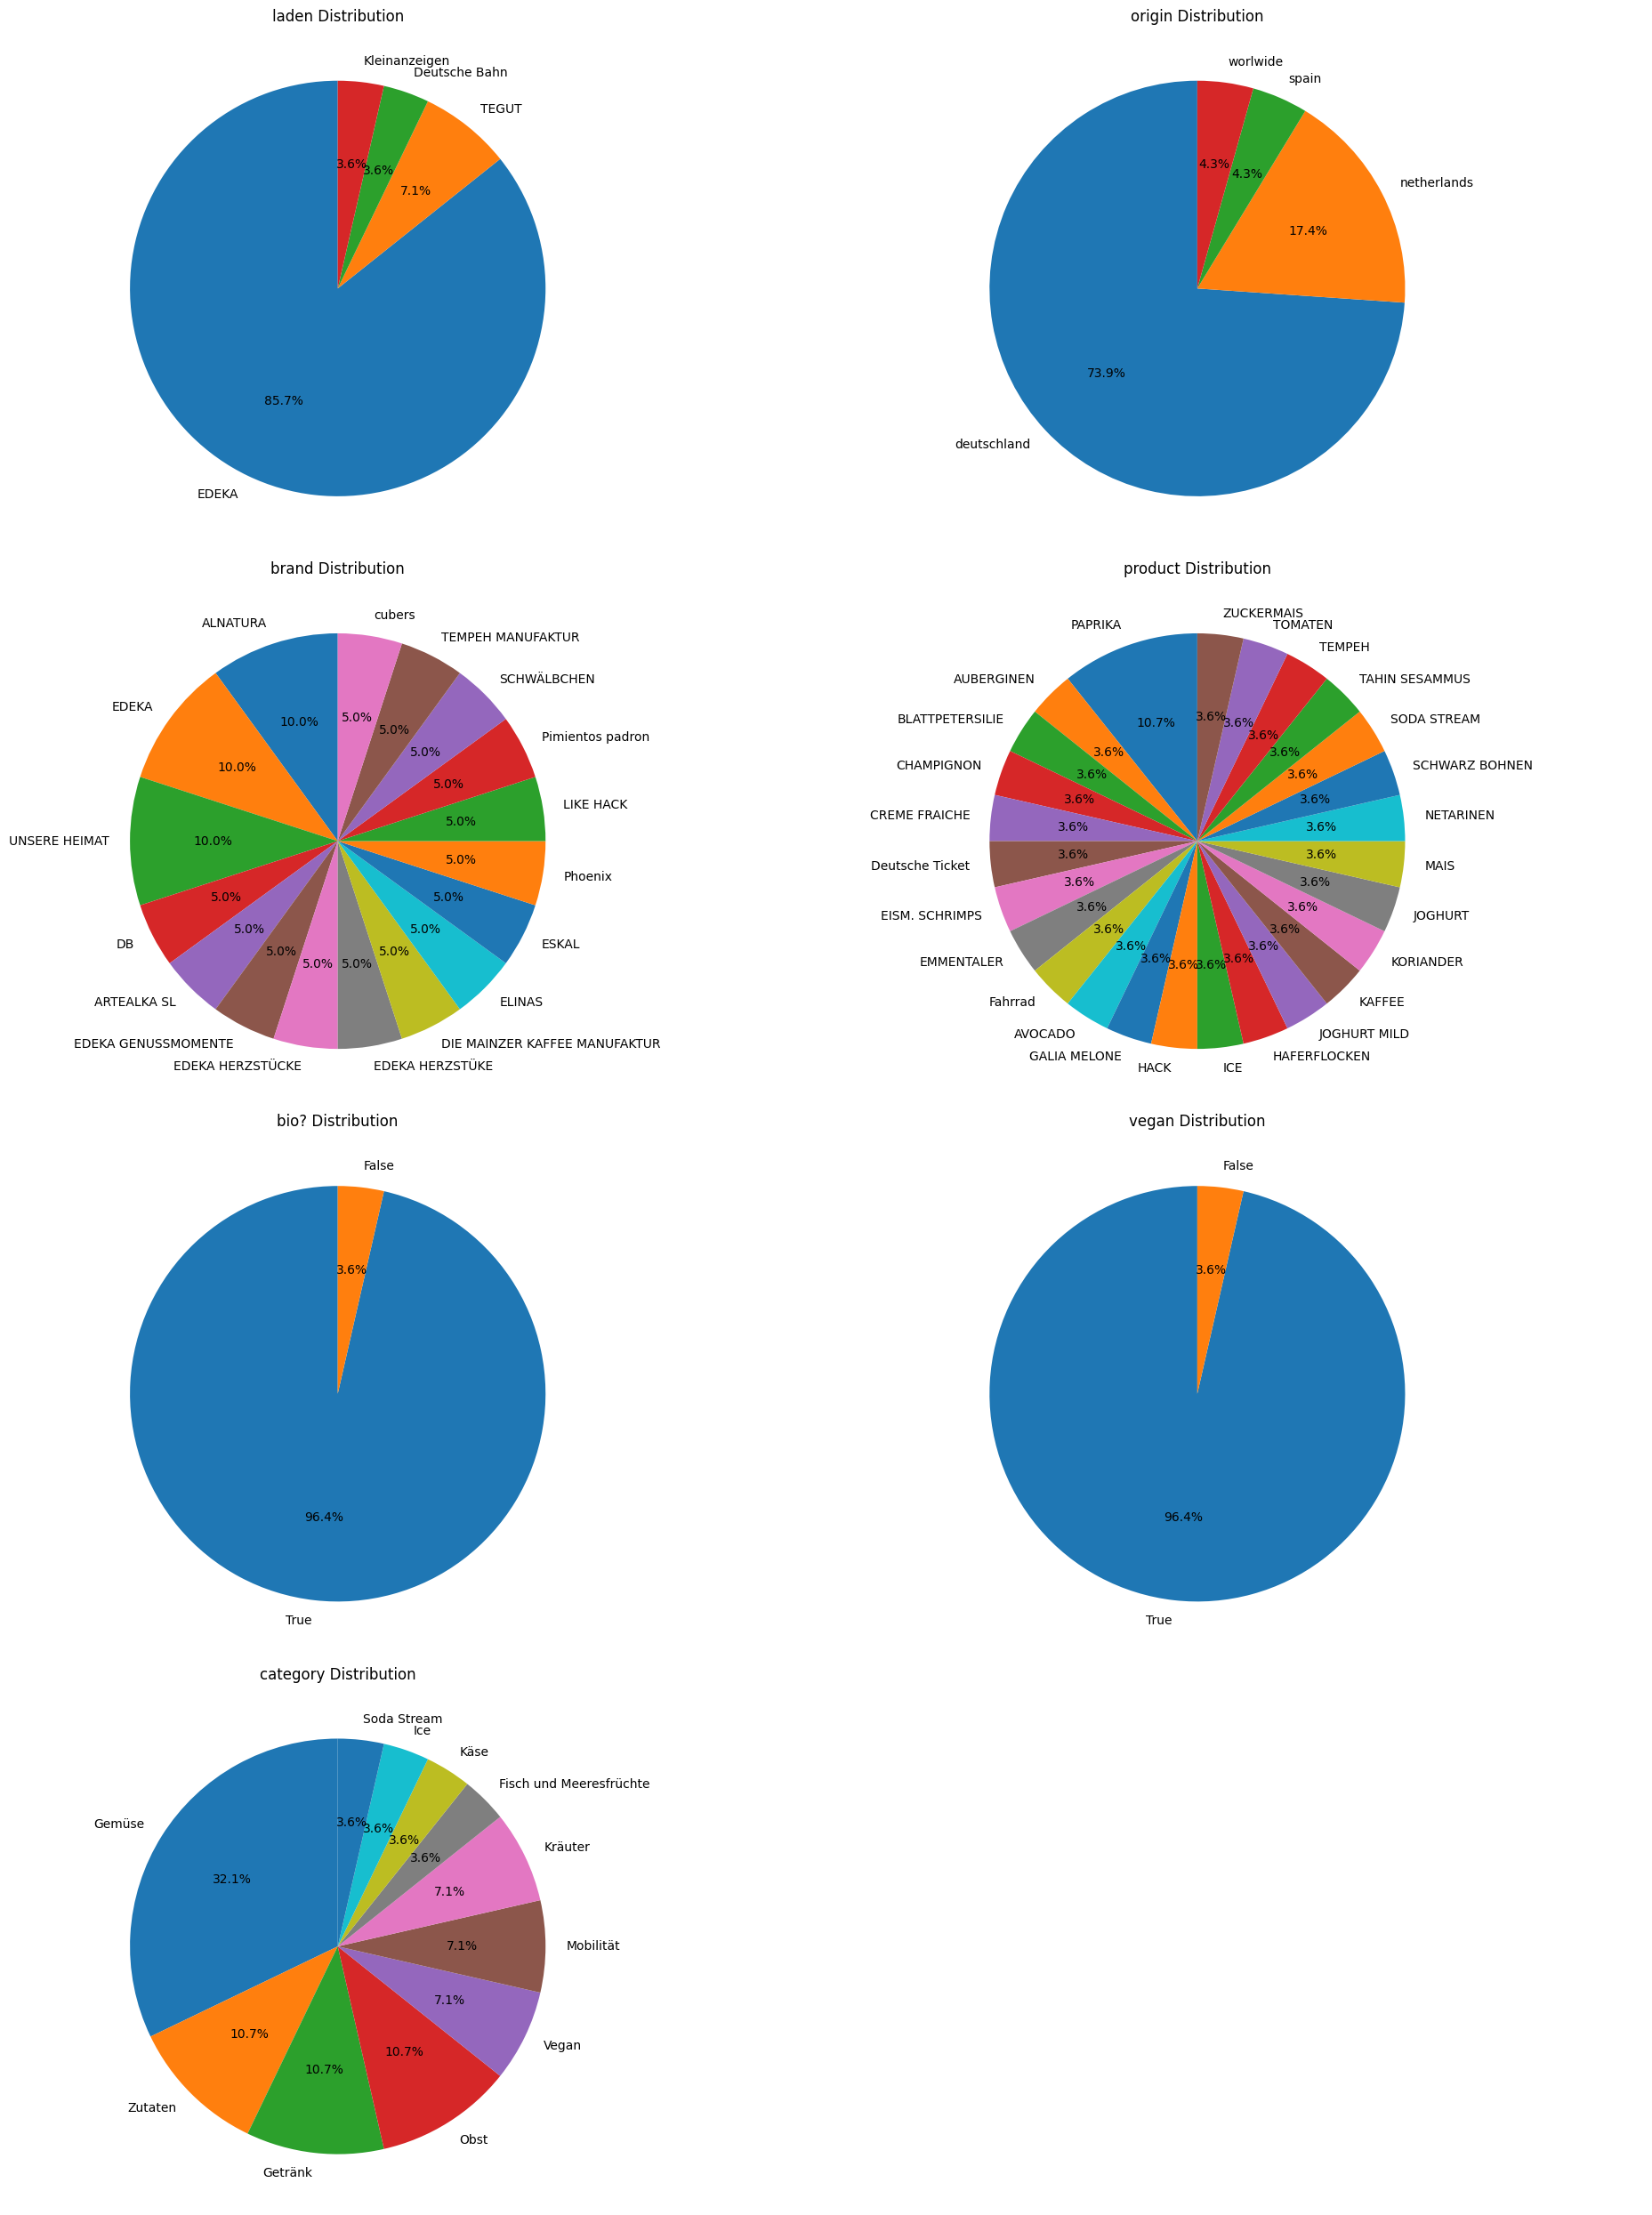

In [9]:
from toolkit.utils import graph_pie
column_names = [
    "laden",
    "origin",
    "brand",
    "product",
    "bio?",
    "vegan",
    "category"
]
graph_pie(df, column_names=column_names, num_columns=2, figsize=(20, 25))

## Calculo de gastos a través del tiempo

In [10]:
print(df['datum'].dtype)

datetime64[ns]


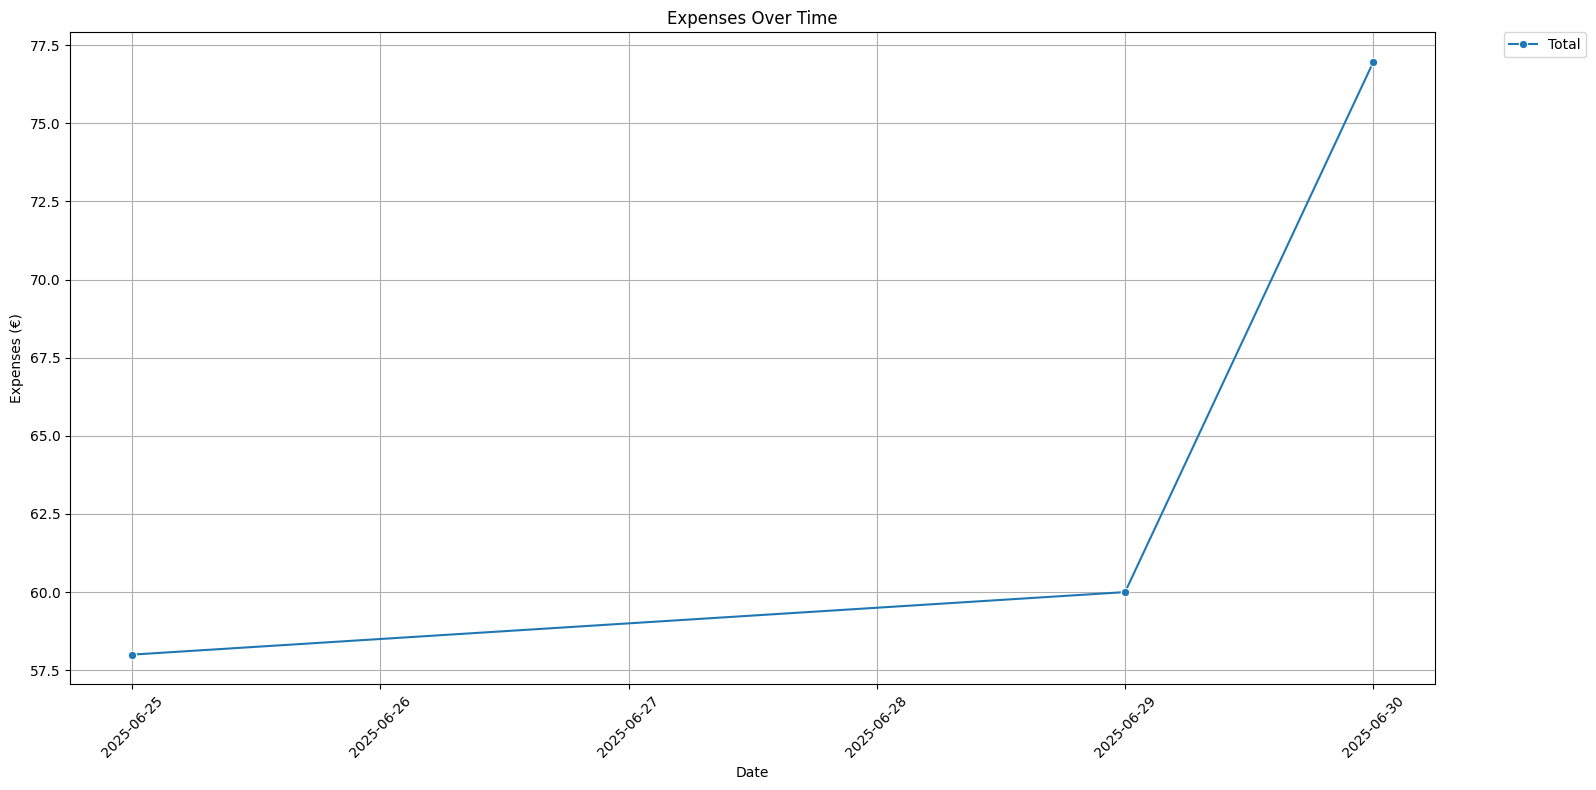

In [11]:
from toolkit.utils import plot_expense_line
plot_expense_line(df)

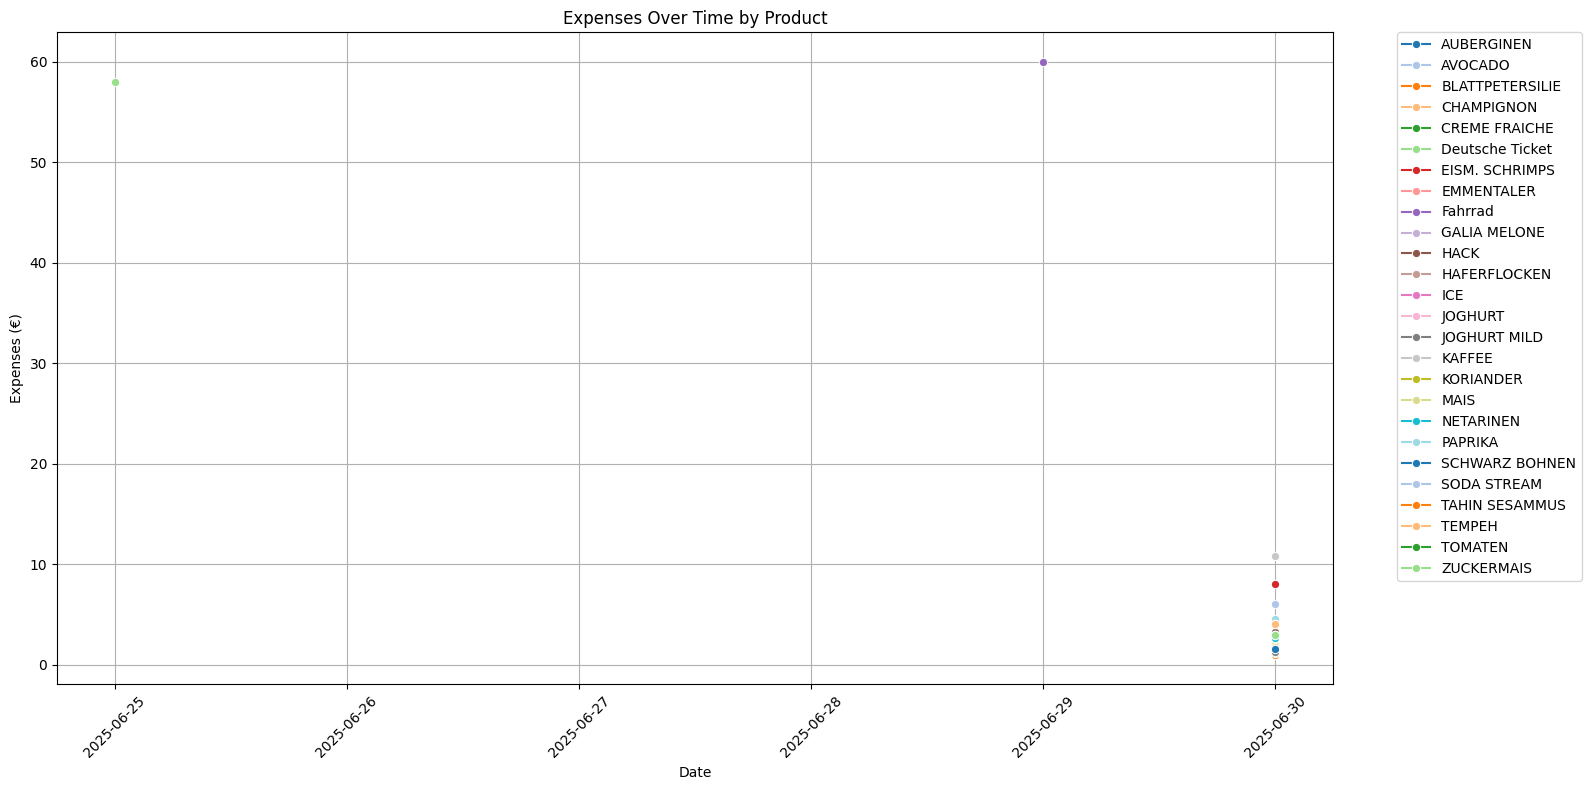

In [12]:
plot_expense_line(df, group_by='product') 

## Gasto mensual acumulado Junio

In [13]:
# Create Year-Month period
df['year_month'] = df['datum'].dt.to_period('M')

# Group by month and sum
monthly_sum = df.groupby('year_month')['preis'].sum().sort_index()

# Calculate cumulative sum
accumulated_expense = monthly_sum.cumsum()

# Combine into one DataFrame for display
result = pd.DataFrame({
    'Month': monthly_sum.index.to_timestamp(),  # convert Period to Timestamp
    'Monthly Expense (€)': monthly_sum.values,
    'Cumulative Expense (€)': accumulated_expense.values
})

# Show the table
print(result)

       Month  Monthly Expense (€)  Cumulative Expense (€)
0 2025-06-01               194.96                  194.96
